In [3]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\EZEN\AppData\Local\Temp\ipykernel_19852\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('terror.csv')

In [5]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,NaN,NaN
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Assassination,NaN,NaN
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,NaN,NaN
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN


In [6]:
# 결측치의 개수를 확인
df.isna().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
attacktype1_txt         0
attacktype2_txt    201272
attacktype3_txt    209048
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   iyear            209706 non-null  int64 
 1   imonth           209706 non-null  int64 
 2   iday             209706 non-null  int64 
 3   country_txt      209706 non-null  object
 4   region_txt       209706 non-null  object
 5   attacktype1_txt  209706 non-null  object
 6   attacktype2_txt  8434 non-null    object
 7   attacktype3_txt  658 non-null     object
dtypes: int64(3), object(5)
memory usage: 12.8+ MB


In [8]:
# 시계열 데이터 만들기
# df 데이터프레임에 있는 iyear, imonth, iday 데이터를 모아서 시계열 데이터로 변경

# int 데이터 타입의 스리즈를 문자 데이터 타입으로 변경
str(df['iyear']) #스리즈 데이터는 문자형으로 변환

'0         1970\n1         1970\n2         1970\n3         1970\n4         1970\n          ... \n209701    2020\n209702    2020\n209703    2020\n209704    2020\n209705    2020\nName: iyear, Length: 209706, dtype: int64'

In [9]:
df['iyear']

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
209701    2020
209702    2020
209703    2020
209704    2020
209705    2020
Name: iyear, Length: 209706, dtype: int64

In [10]:
df['iyear'].astype('str')

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
209701    2020
209702    2020
209703    2020
209704    2020
209705    2020
Name: iyear, Length: 209706, dtype: object

In [11]:
#dtype이 int64에서 object로 바뀐 것 확인

In [12]:

df['imonth'].astype('str')

0          7
1          0
2          1
3          1
4          1
          ..
209701    12
209702    12
209703    12
209704    12
209705    12
Name: imonth, Length: 209706, dtype: object

In [13]:
# 두 번째 값 0을 1로 바꿔야 함.
df['imonth'].astype('str').replace('0', '1')

0          7
1          1
2          1
3          1
4          1
          ..
209701    12
209702    12
209703    12
209704    12
209705    12
Name: imonth, Length: 209706, dtype: object

In [14]:
df['iday'].astype('str').replace('0', '1')

0          2
1          1
2          1
3          1
4          1
          ..
209701    31
209702    31
209703    31
209704    31
209705    31
Name: iday, Length: 209706, dtype: object

In [15]:
#맨 끝 역슬러시는 다음줄과 연결이라는 의미
date = df['iyear'].astype('str') + '-' + \
df['imonth'].astype('str').replace('0', '1') + '-' + \
df['iday'].astype('str').replace('0', '1')

In [16]:
# date 스리즈를 시계열 데이터로 변경하여 df 새로운 파생변수 생성
df['date'] = pd.to_datetime(date, format='%Y-%m-%d')

In [17]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,date
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,NaN,NaN,1970-07-02
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),NaN,NaN,1970-01-01
2,1970,1,0,Philippines,Southeast Asia,Assassination,NaN,NaN,1970-01-01
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,NaN,NaN,1970-01-01
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN,1970-01-01


In [18]:
## 한국의 테러 데이터를 로드
flag = df['country_txt'] == 'South Korea'
korea_data = df.loc[flag,]

In [19]:
korea_data.groupby('attacktype1_txt').count()['date']

attacktype1_txt
Armed Assault                      5
Assassination                      3
Bombing/Explosion                  5
Facility/Infrastructure Attack    15
Hostage Taking (Kidnapping)        2
Unarmed Assault                    4
Unknown                            6
Name: date, dtype: int64

<Axes: xlabel='attacktype1_txt'>

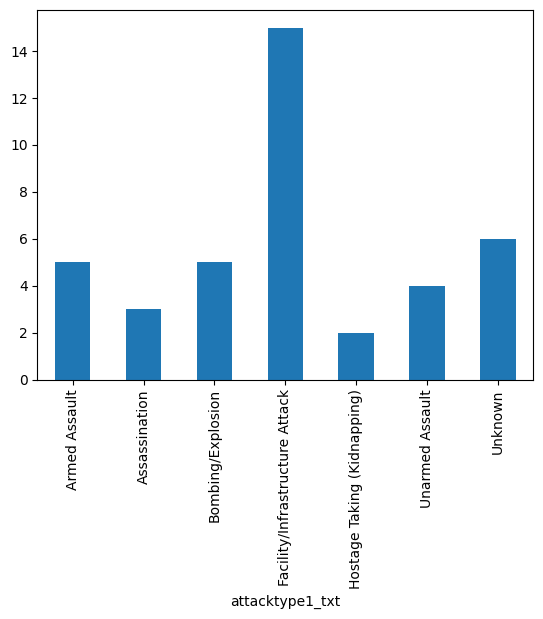

In [20]:
korea_data.groupby('attacktype1_txt').count()['date'].plot(kind="bar")

<Axes: xlabel='region_txt'>

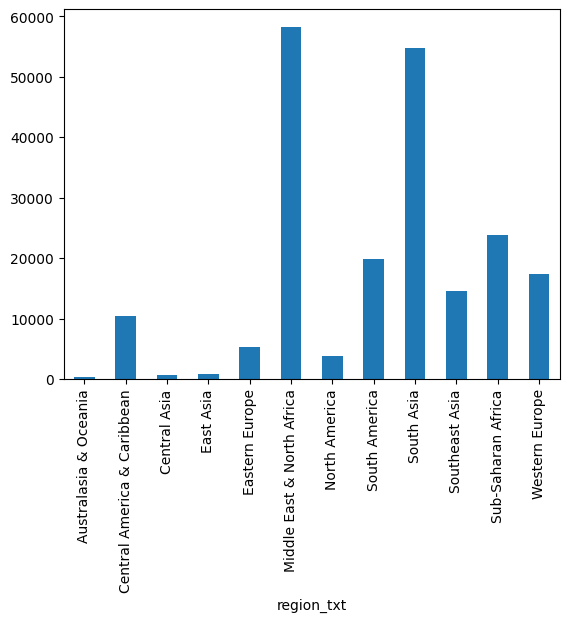

In [21]:
# 대륙별 테러의 횟수를 그래프 출력
df.groupby('region_txt').count()['attacktype1_txt']
df.groupby('region_txt').count()['attacktype1_txt'].plot(kind='bar')


In [22]:
region_data = df.groupby('region_txt').count()['attacktype1_txt']

<Axes: xlabel='region_txt'>

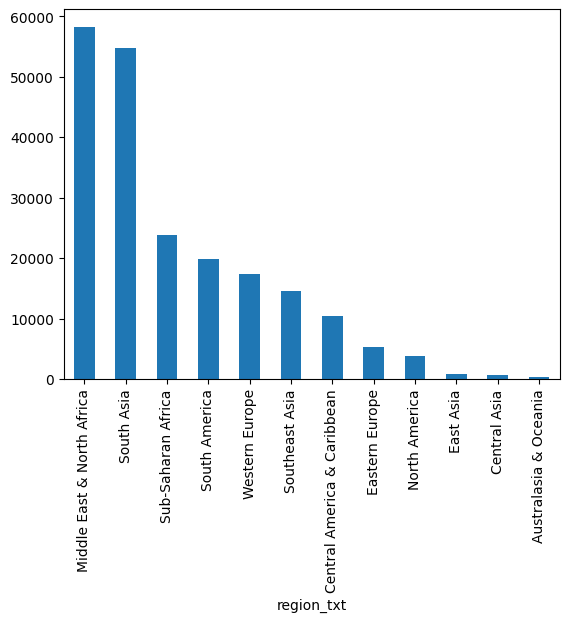

In [23]:
region_data.sort_values(ascending=False).plot(kind='bar')

In [24]:
#2015년부터의 데이터만 필터링
df_2015_after = df.loc[df['iyear'] >= 2015, ]


In [25]:
group_data = df_2015_after.groupby('region_txt').count()['attacktype1_txt']

In [26]:
# group_data 내림차순 정렬
group_data = group_data.sort_values(ascending=False)

In [27]:
group_data

region_txt
Middle East & North Africa     23651
South Asia                     21403
Sub-Saharan Africa             12206
Southeast Asia                  5182
Western Europe                  1591
South America                   1368
Eastern Europe                  1109
North America                    599
East Asia                         88
Australasia & Oceania             82
Central America & Caribbean       51
Central Asia                      51
Name: attacktype1_txt, dtype: int64

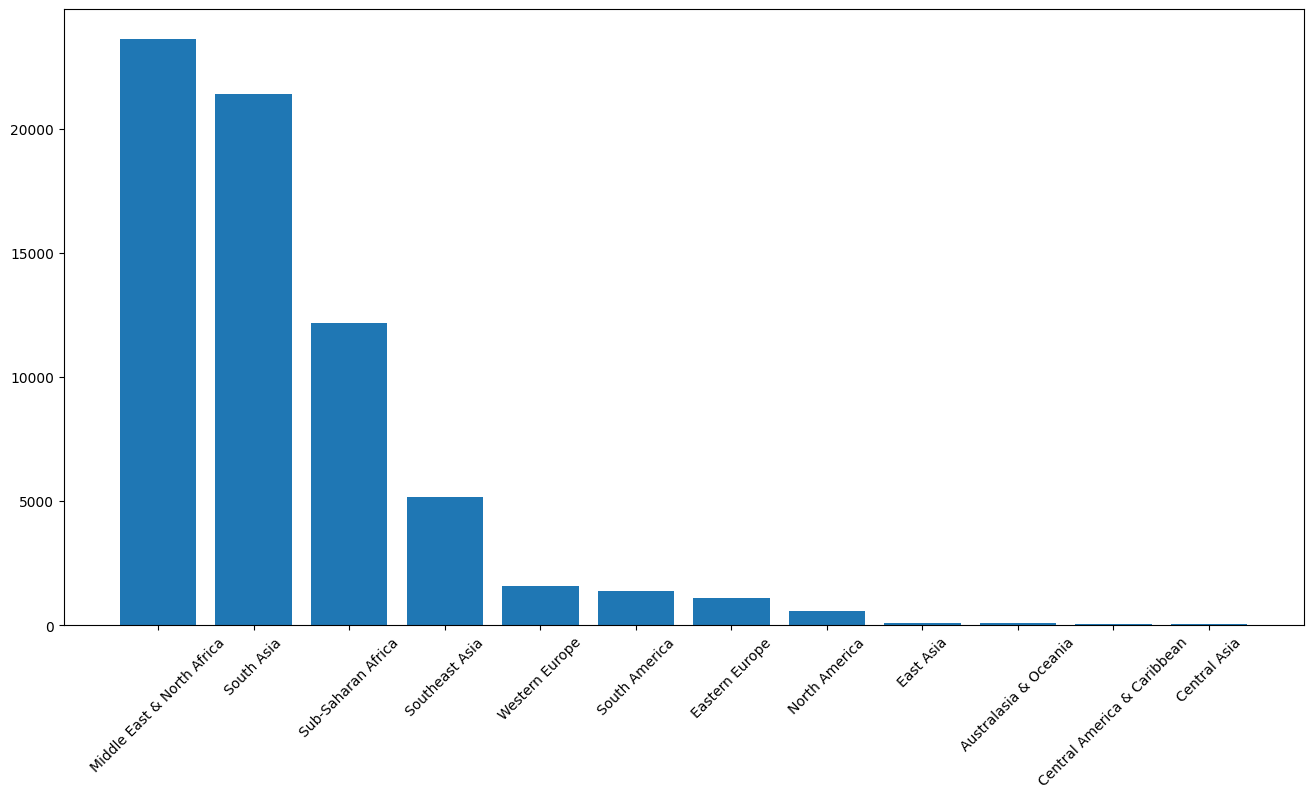

In [28]:
# matplot으로 그래프 시각화
x = group_data.index
y = group_data.values

# 그래프 크기 조절
plt.figure(figsize=(16, 8))
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()

In [29]:
# 남부 아시아의 데이터만 필터링. 연도 1990 이후
flag = (df['region_txt'] == 'South Asia') & (df['iyear'] >= 1990)
south_asia_data = df.loc[flag, ]

<Axes: ylabel='iyear'>

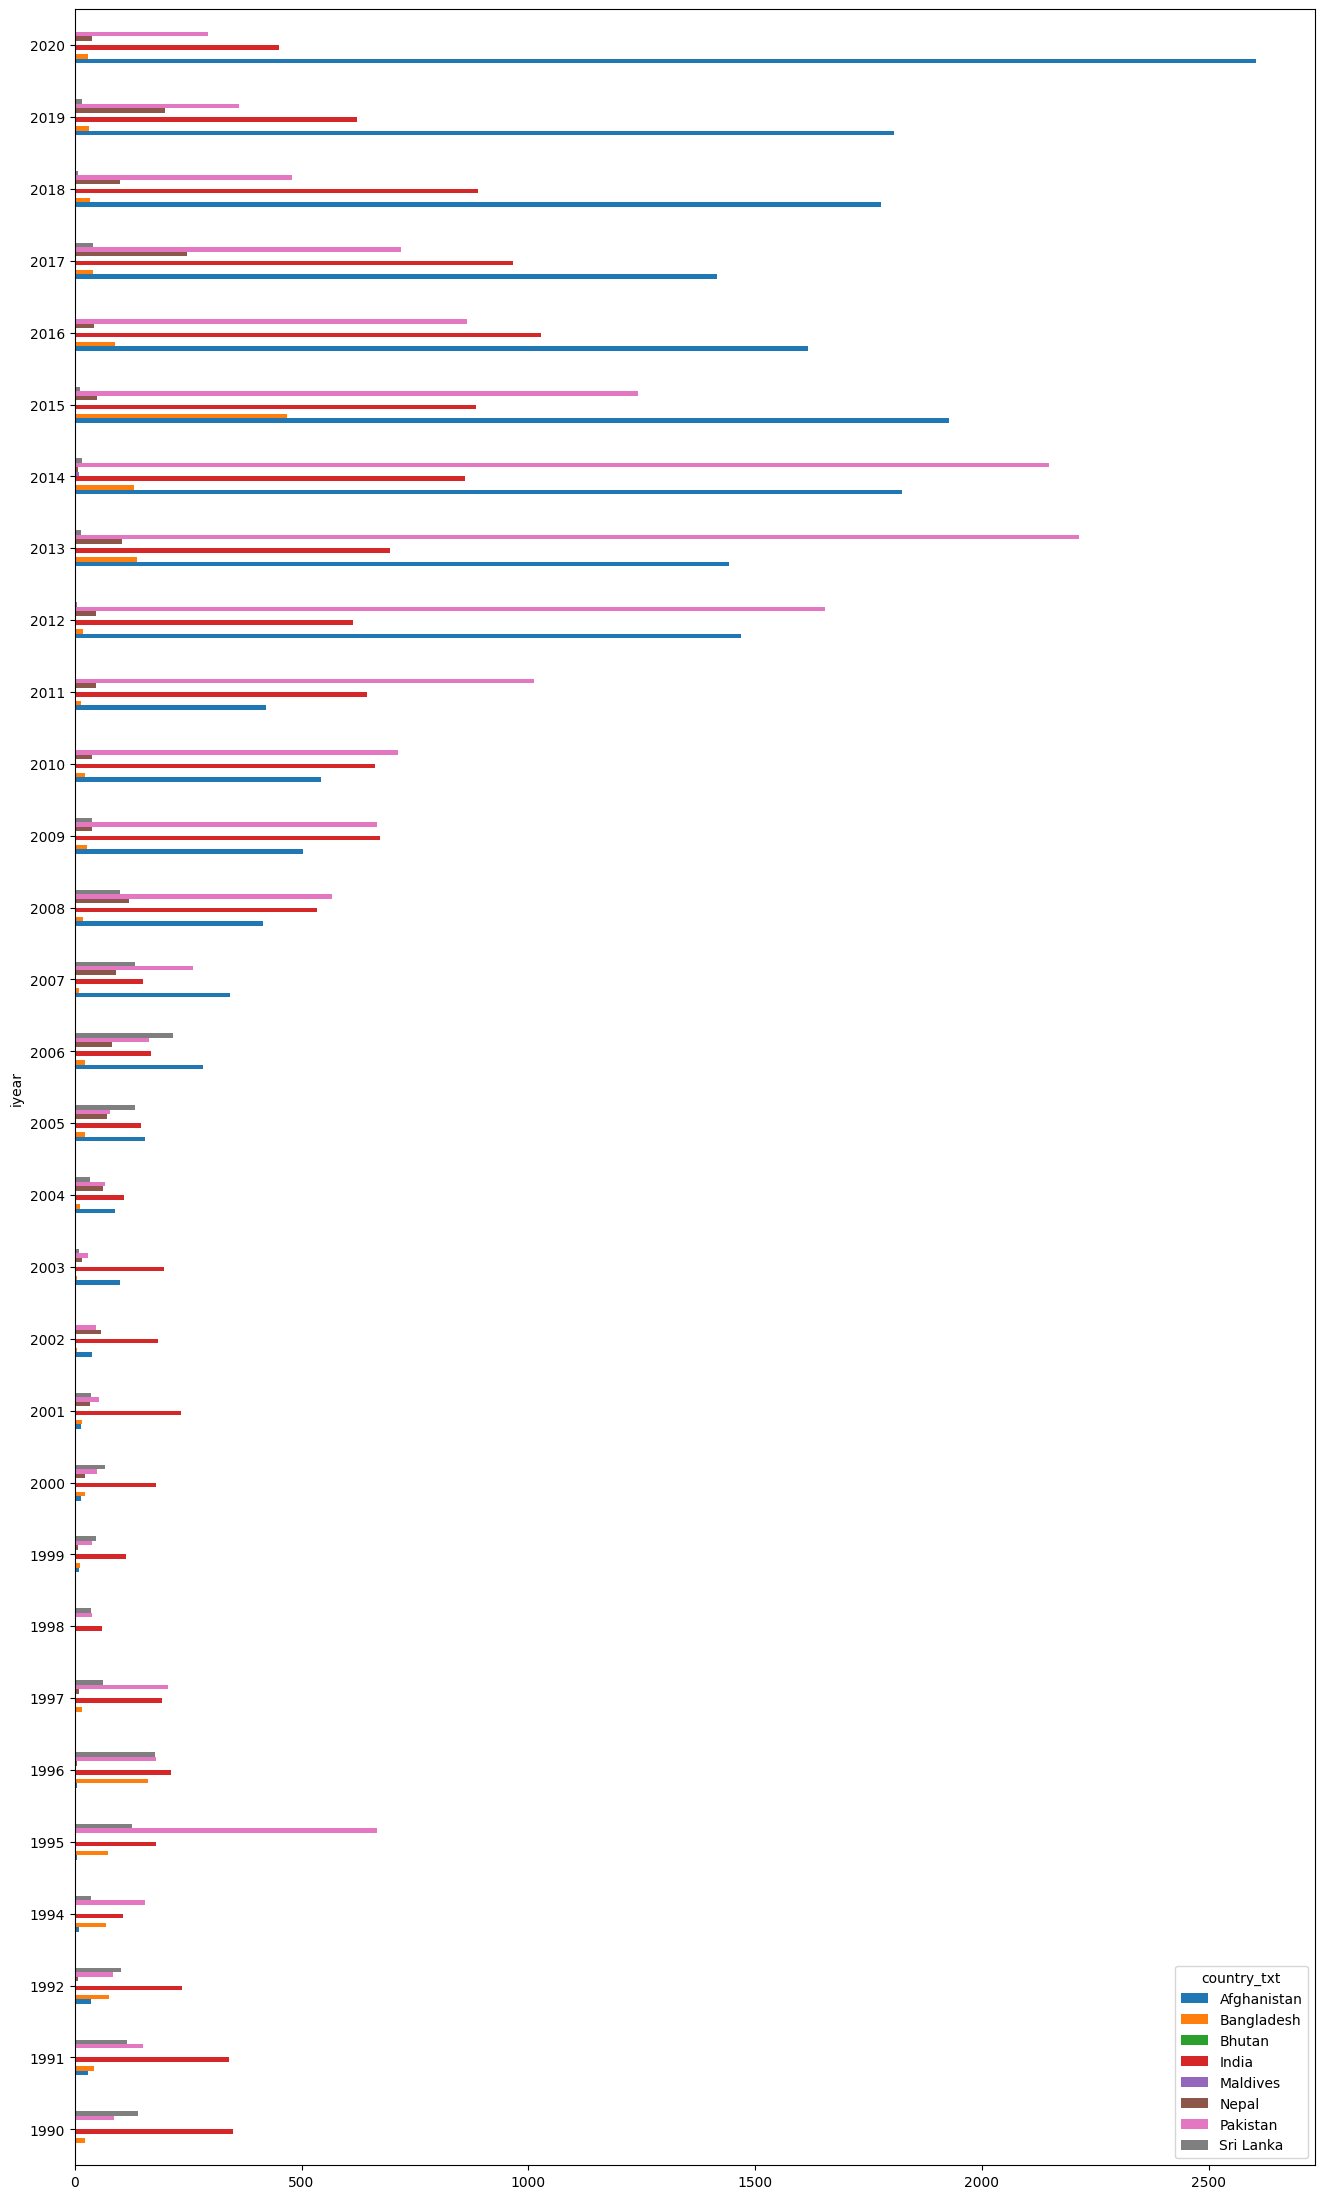

In [33]:
pd.pivot_table(
    south_asia_data,
    index = 'iyear',
    columns = 'country_txt',
    values = 'attacktype1_txt',
    aggfunc = 'count',
    fill_value = 0
).plot(kind='barh', figsize=(16, 28))

In [35]:
# south_asia_data에서 몇 개의 국가가 있는가?
_list = south_asia_data['country_txt'].unique()

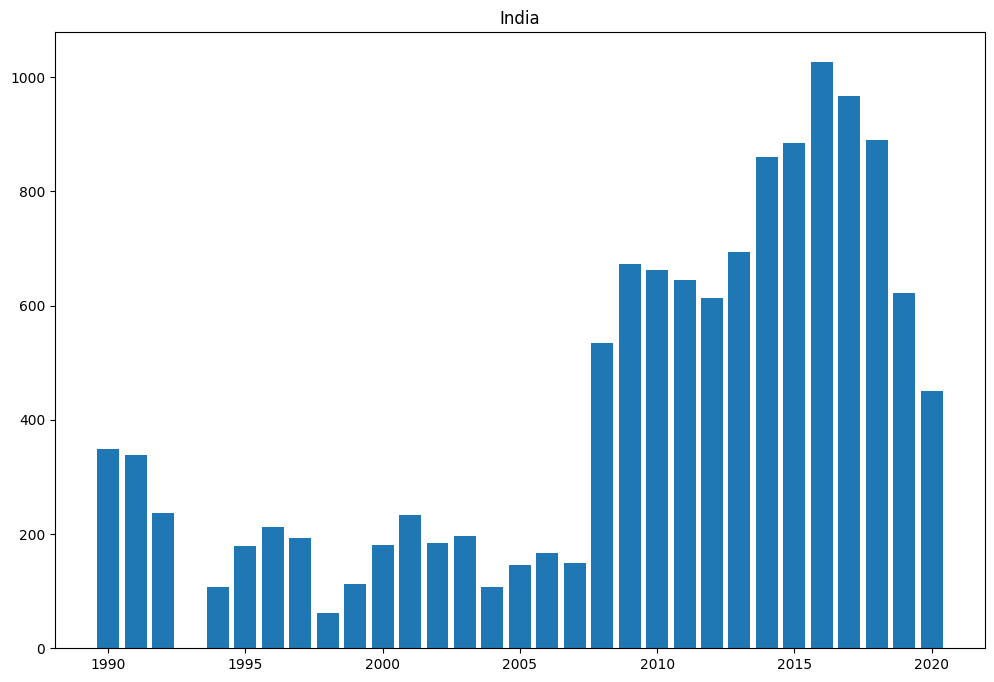

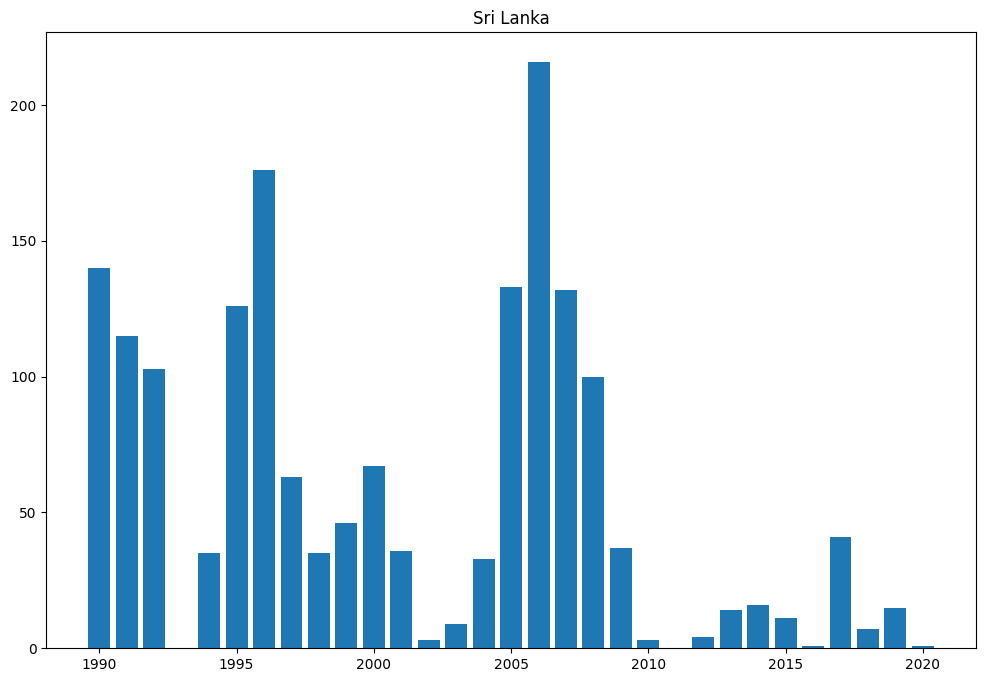

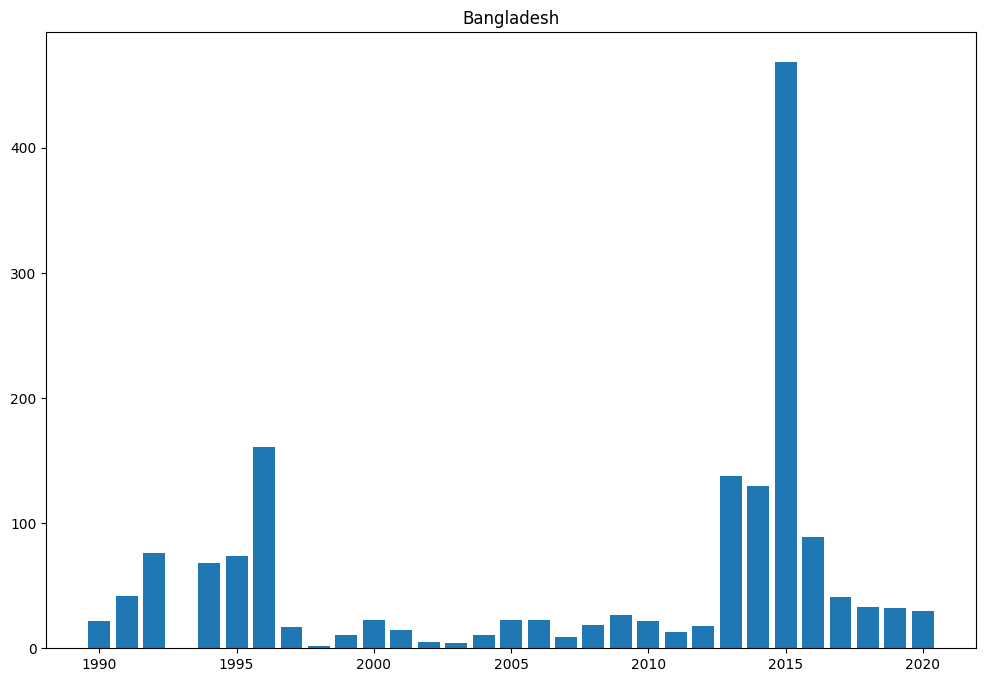

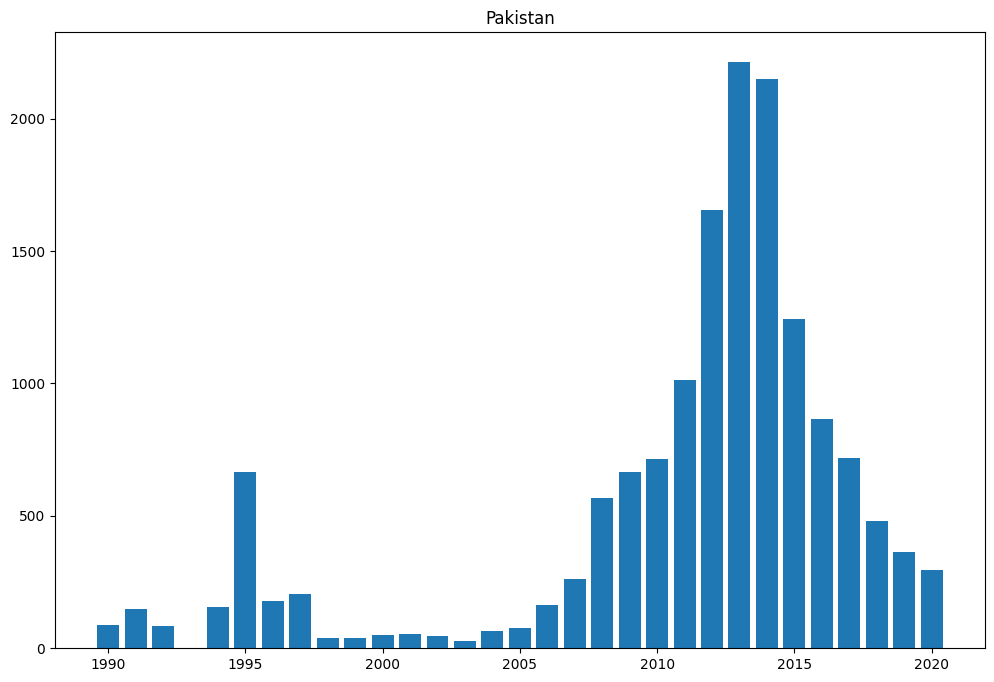

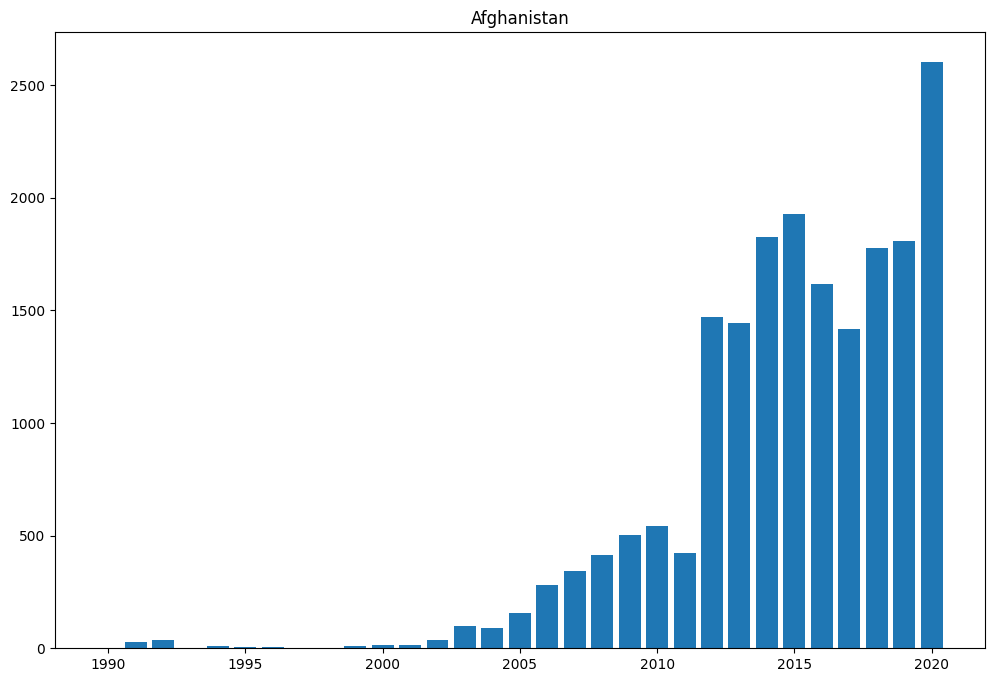

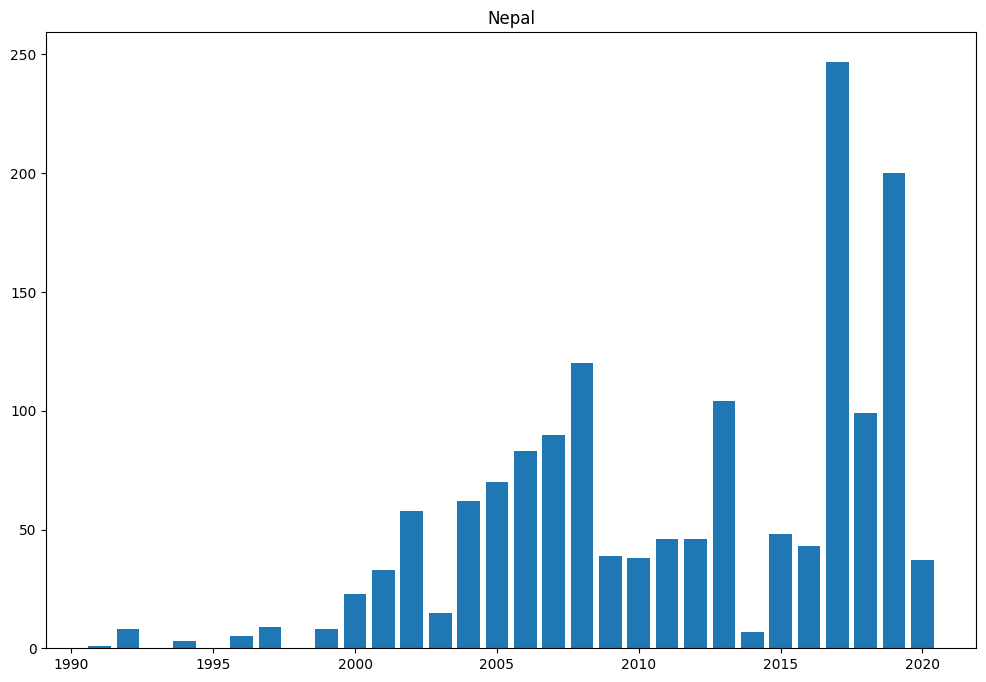

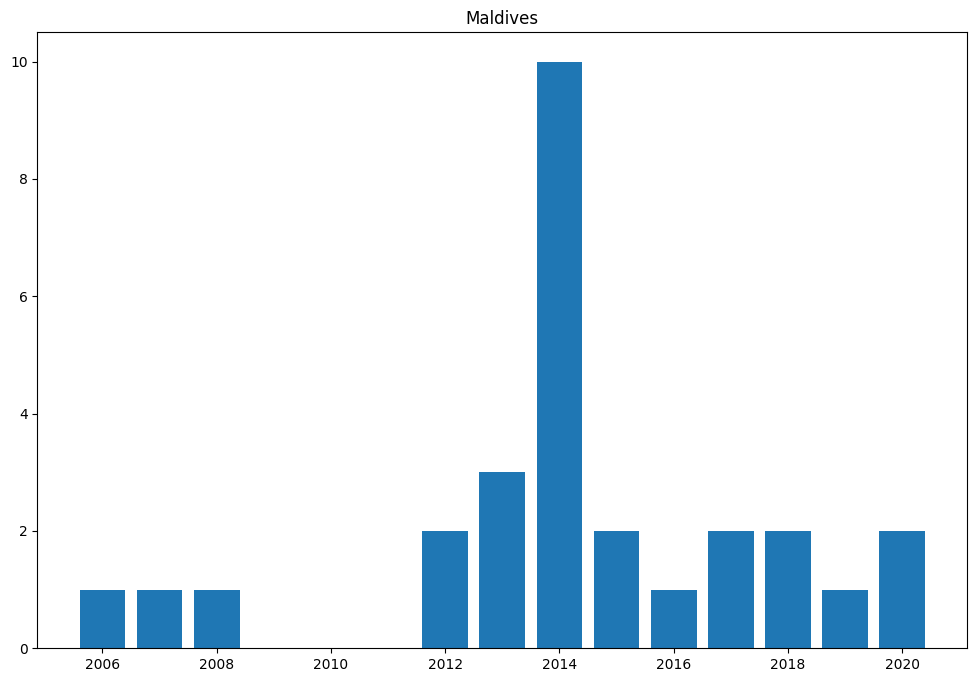

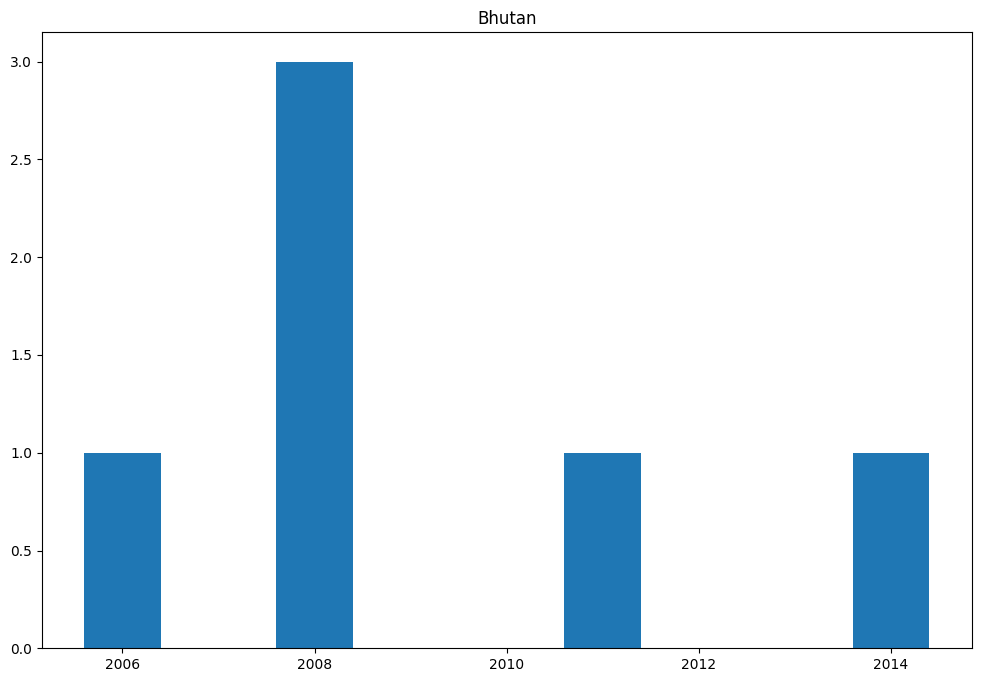

In [38]:
for country in _list:
    # country : 국가의 이름들이 하나씩 대입하여 실행
    # print(country)
    data = south_asia_data.loc[south_asia_data['country_txt'] == country, ]
    group_data = data.groupby('iyear').count()['attacktype1_txt']
    # 그래프 시각화
    x = group_data.index
    y = group_data.values
    plt.figure(figsize=(12, 8))
    plt.bar(x, y)
    plt.title(country)
    plt.show()